In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [ ]:
from google.colab import files
df = files.upload()

Saving HINDI DATASET.csv.xls to HINDI DATASET.csv.xls


In [ ]:
import io
df = pd.read_csv(io.BytesIO(df['HINDI DATASET.csv.xls']))

In [ ]:
texts = []
labels = []
for i, label in enumerate(df['labels']):
    texts.append(df['text_hi'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

True
The number of training 4457, validation 1115 


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

Found 8536 unique words: 
data shape:  (5572, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
56/56 [==============================] - 8s 121ms/step - loss: 0.3993 - acc: 0.8637 - val_loss: 0.2944 - val_acc: 0.8913
Epoch 2/10
56/56 [==============================] - 7s 116ms/step - loss: 0.2179 - acc: 0.9248 - val_loss: 0.1735 - val_acc: 0.9406
Epoch 3/10
56/56 [==============================] - 7s 117ms/step - loss: 0.1523 - acc: 0.9453 - val_loss: 0.1525 - val_acc: 0.9529
Epoch 4/10
56/56 [==============================] - 7s 117ms/step - loss: 0.0887 - acc: 0.9731 - val_loss: 0.1386 - val_acc: 0.9585
Epoch 5/10
56/56 [==============================] - 6s 116ms/step - loss: 0.2398 - acc: 0.9041 - val_loss: 0.5470 - val_acc: 0.7388
Epoch 6/10
56/56 [==============================] - 7s 116ms/step - loss: 0.2053 - acc: 0.9243 - val_loss: 0.2354 - val_acc: 0.9159
Epoch 7/10
56/56 [==============================] - 6s 116ms/step - loss: 0.1113 - acc: 0.9624 - val_loss: 0.1522 - val_acc: 0.9585
Epoch 8/10
56/56 [==============================] - 7s 117ms/step - loss: 0.

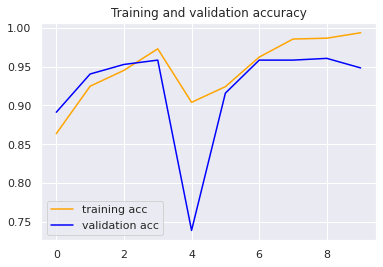

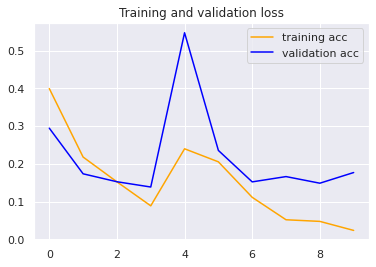

In [ ]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} and accuracy is {1:.2f}  ".format(acc[0],acc[1]))


35/35 [==============================] - 1s 23ms/step
Test loss is 0.18 and accuracy is 0.94  


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
56/56 [==============================] - 16s 258ms/step - loss: 0.3479 - acc: 0.8712 - val_loss: 0.2646 - val_acc: 0.8845
Epoch 2/10
56/56 [==============================] - 16s 280ms/step - loss: 0.1773 - acc: 0.9464 - val_loss: 0.1741 - val_acc: 0.9462
Epoch 3/10
56/56 [==============================] - 14s 248ms/step - loss: 0.1377 - acc: 0.9647 - val_loss: 0.1336 - val_acc: 0.9619
Epoch 4/10
56/56 [==============================] - 14s 247ms/step - loss: 0.1019 - acc: 0.9711 - val_loss: 0.1927 - val_acc: 0.9496
Epoch 5/10
56/56 [==============================] - 14s 247ms/step - loss: 0.1009 - acc: 0.9705 - val_loss: 0.1224 - val_acc: 0.9585
Epoch 6/10
56/56 [==============================] - 14s 248ms/step - loss: 0.0592 - acc: 0.9860 - val_loss: 0.1207 - val_acc: 0.9664
Epoch 7/10
56/56 [==============================] - 14s 249ms/step - loss: 0.0810 - acc: 0.9683 - val_loss: 0.1451 - val_acc: 0.9630
Epoch 8/10
56/56 [==============================] - 14s 250ms/step - 

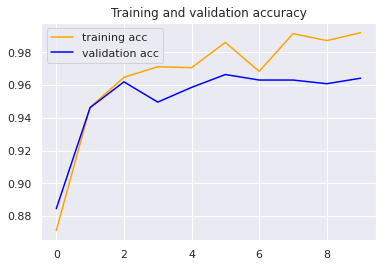

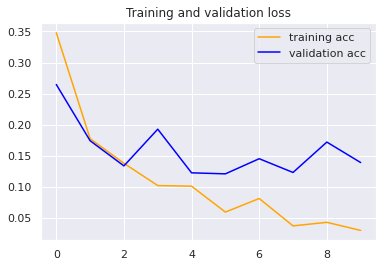

In [ ]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
pred = model.predict(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))


35/35 [==============================] - 1s 40ms/step
Test loss is 0.16 accuracy is 0.95  
